In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

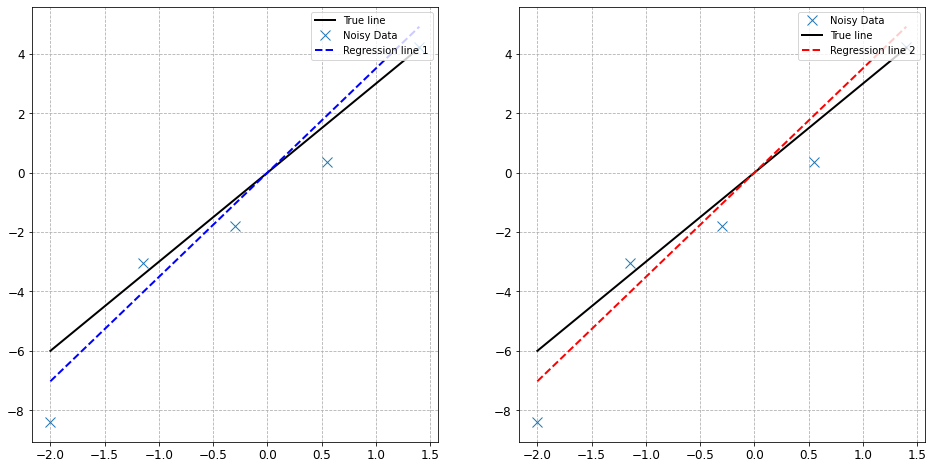

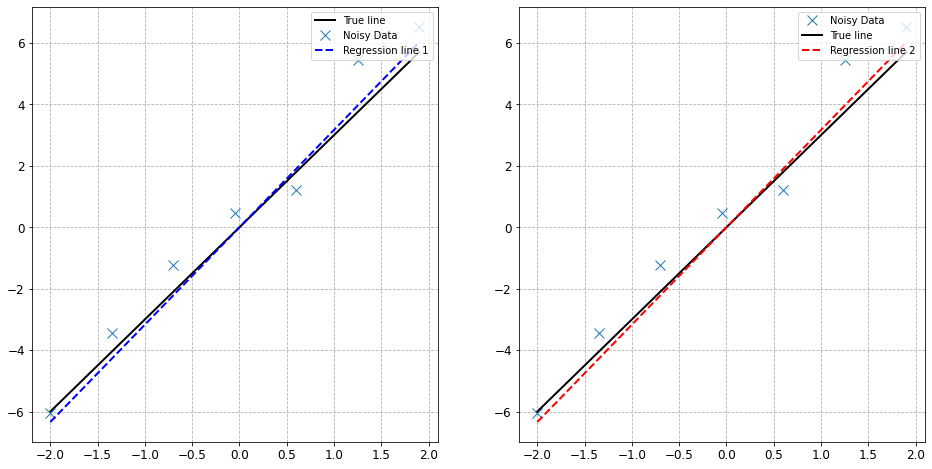

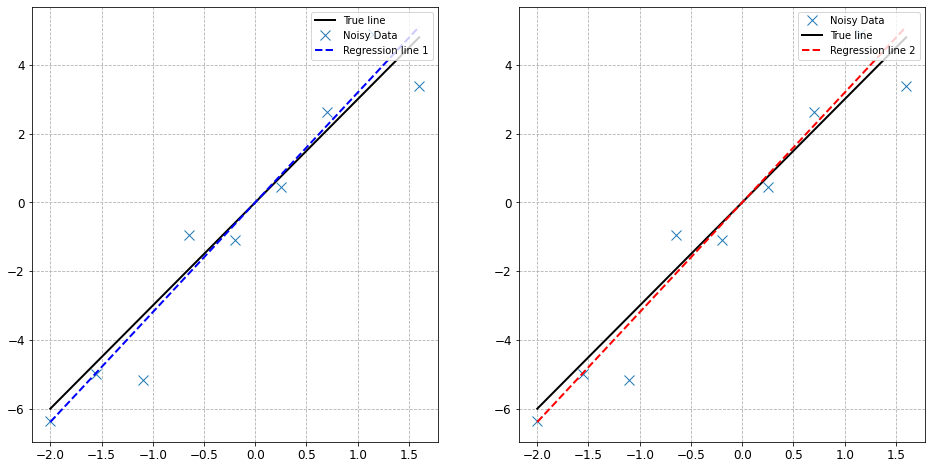

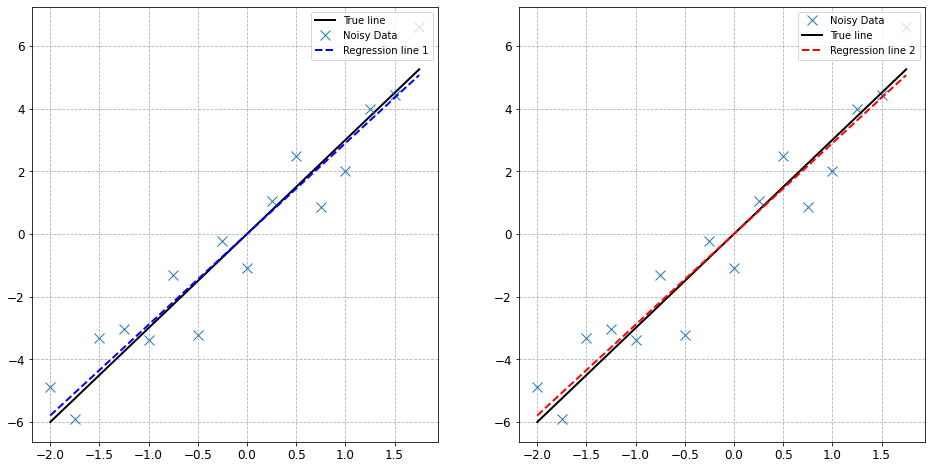

In [2]:
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size' : 12})

x = 3 # True slope
num_data = np.flip(np.arange(0.25, 1, 0.2))

for k in num_data:
    a = np.arange(-2,2,k)
    a = a.reshape(-1,1) # -1 means interpreter will substitute the only possible value
    b = x*a + np.random.randn(*a.shape) #adding noise

    U, S, VT = np.linalg.svd(a, full_matrices = False)    
    xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
    
    xtilde2 = np.linalg.pinv(a) @ b
    
    plt.subplot(1,2,1)
    plt.plot(a, x*a, color = 'k', linewidth = 2, label = 'True line')
    plt.plot(a, b, 'x', markersize = 10, label = 'Noisy Data')
    plt.plot(a, xtilde1*a, '--', color = 'b', linewidth = 2, label = 'Regression line 1')
    plt.grid(linestyle = '--')
    plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)
    
    plt.subplot(1,2,2)
    plt.plot(a, b, 'x', markersize = 10, label = 'Noisy Data')
    plt.plot(a, x*a, color = 'k', linewidth = 2, label = 'True line')
    plt.plot(a, xtilde2*a, '--', color = 'r', linewidth = 2, label = 'Regression line 2')
    plt.grid(linestyle = '--')
    plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)
    
    plt.show()

# As data points are increasing regression line is approaching towards the true slope
# We can calculate that by SVD and pseudo inverse

In the next example all the data has been taken which should not be done as it can cause overfitting

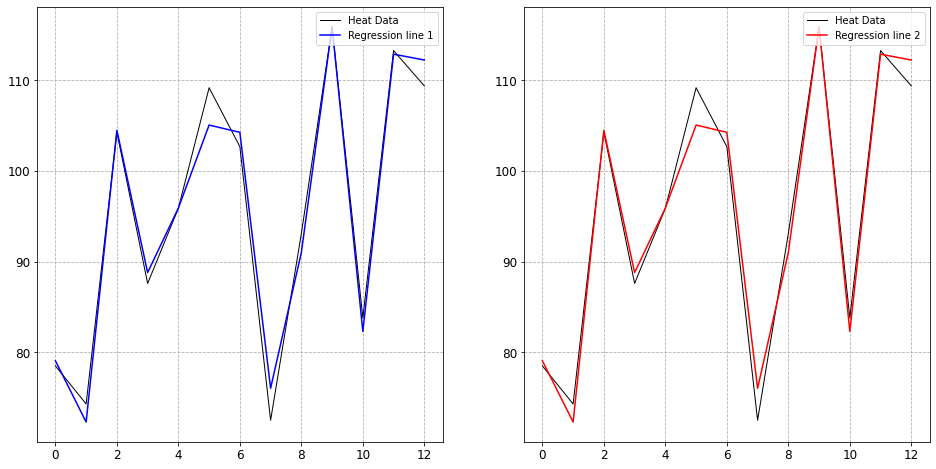

In [3]:
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size' : 12})

A = np.loadtxt(os.path.join('.','csv','hald_ingredients.csv'), delimiter = ',')
b = np.loadtxt(os.path.join('.','csv','hald_heat.csv'), delimiter = ',')

U , S , VT = np.linalg.svd(A, full_matrices = False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

xtilde2 = np.linalg.pinv(A) @ b

plt.subplot(1,2,1)
plt.plot(b, color = 'k', linewidth = 1, label = 'Heat Data')
plt.plot(A @ xtilde1, color = 'b', linewidth = 1.5, label = 'Regression line 1')
plt.grid(linestyle = '--')
plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)

plt.subplot(1,2,2)
plt.plot(b, color = 'k', linewidth = 1, label = 'Heat Data')
plt.plot(A @ xtilde2, color = 'r', linewidth = 1.5, label = 'Regression line 2')
plt.grid(linestyle = '--')
plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)

plt.show()

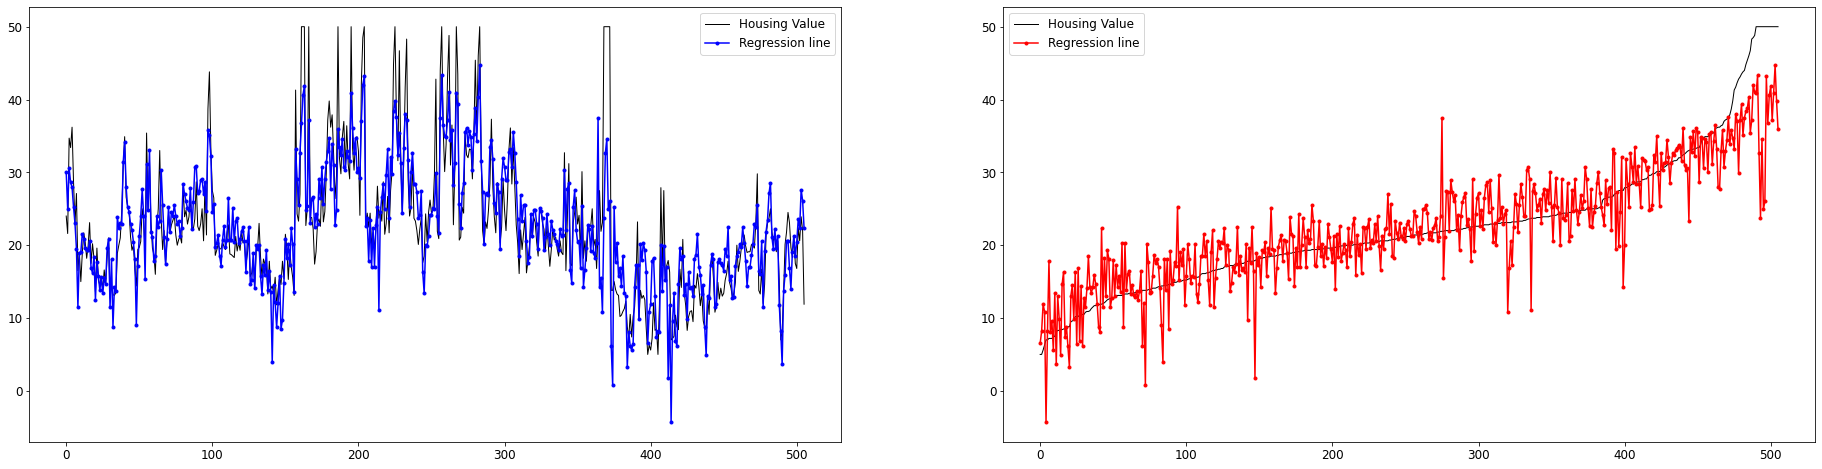

In [4]:
plt.rcParams['figure.figsize'] = [32,8]
plt.rcParams.update({'font.size' : 12})

H = np.loadtxt(os.path.join('.','csv','housing.data')) # All data
b = H[:,-1] # last column as an array (prices)
A = H[:, :-1] # every column except last as a matrix (features)

# Adding a columns of 1 for having a non-zero offset
A = np.pad(A,[(0,0),(0,1)], mode = 'constant', constant_values = 1)

U, S, VT = np.linalg.svd(A, full_matrices = False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()

ax1 = fig.add_subplot(121)
plt.plot(b, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A @ x, '-o', color = 'b', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] #sorted values
plt.plot(b, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A[sort_ind,:]@x, '-o', color = 'r', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

plt.show()

We added a column of ones to our original matrix for making the y-intercept i.e. $\beta_0$ other than 0 in 
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots$

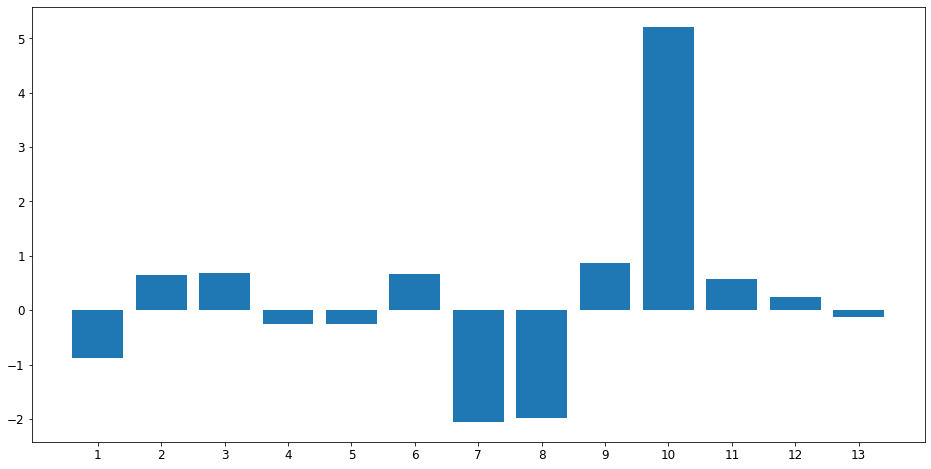

In [5]:
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size' : 12})

A_mean = np.mean(A, axis = 0)
A_mean = A_mean.reshape(-1,1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1] - 1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2, full_matrices = 0)    
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

x_tick = range(len(x) - 1) + np.ones(len(x) - 1) # [1,2,3,4...]
plt.bar(x_tick, x[:-1])
plt.xticks(x_tick)
plt.show()

In the above example we used all the data set for training. This time we are splitting the data into train set and test set

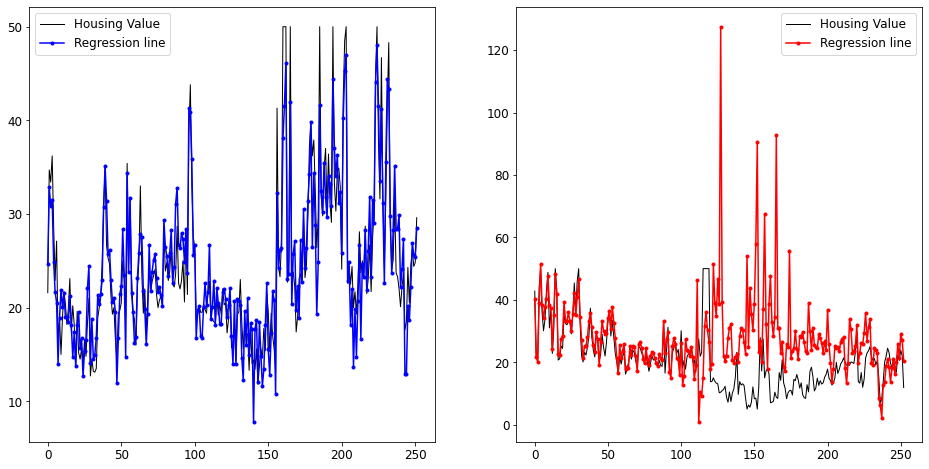

In [6]:
H = np.loadtxt(os.path.join('.','csv','housing.data')) 
b = H[:,-1] 
A = H[:, :-1] 

A = np.pad(A,[(0,0),(0,1)], mode = 'constant', constant_values = 1)

n = 253
b_train = b[1:n]
A_train = A[1:n]
b_test = b[n:]
A_test = A[n:]

U, S, VT = np.linalg.svd(A_train, full_matrices = 0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train

fig = plt.figure()

ax1 = fig.add_subplot(121)
plt.plot(b_train, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_train @ x, '-o', color = 'b', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(b_test, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_test @ x, '-o', color = 'r', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

plt.show()

On taking the first n test cases there could be a possiblity that there is a certain bias in the first test cases and others dont have it so we will permute the test cases this time

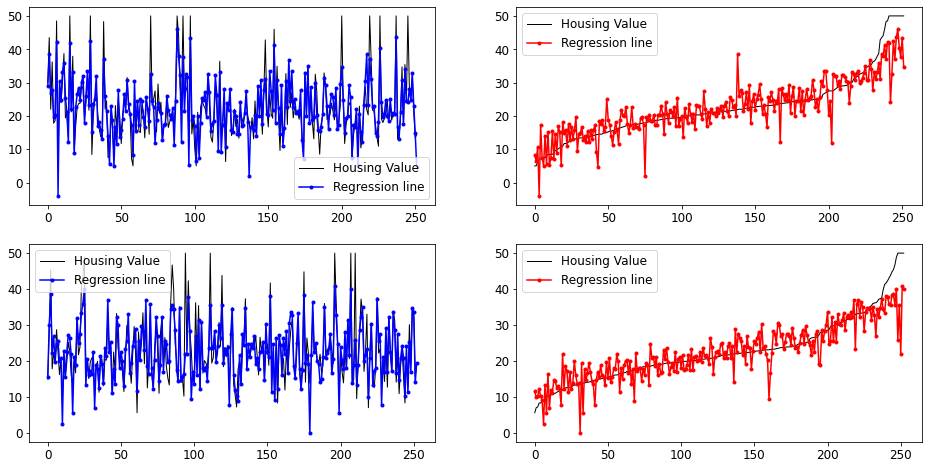

In [7]:
H = np.loadtxt(os.path.join('.','csv','housing.data')) 
b = H[:,-1] 
A = H[:, :-1] 

A = np.pad(A,[(0,0),(0,1)], mode = 'constant', constant_values = 1)

n = 253
p = np.random.permutation(506)
A = A[p,:]
b = b[p]
b_train = b[1:n]
A_train = A[1:n]
b_test = b[n:]
A_test = A[n:]

U, S, VT = np.linalg.svd(A_train, full_matrices = 0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train

fig = plt.figure()

ax1 = fig.add_subplot(221)
plt.plot(b_train, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_train @ x, '-o', color = 'b', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

ax2 = fig.add_subplot(222)
sort_ind = np.argsort(b_train[:])
b_train = b_train[sort_ind] #sorted values
plt.plot(b_train, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_train[sort_ind,:]@x, '-o', color = 'r', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

ax3 = fig.add_subplot(223)
plt.plot(b_test, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_test @ x, '-o', color = 'b', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

ax4 = fig.add_subplot(224)
sort_ind = np.argsort(b_test[:])
b_test = b_test[sort_ind] #sorted values
plt.plot(b_test, color = 'k', linewidth = 1, label = 'Housing Value')
plt.plot(A_test[sort_ind] @ x, '-o', color = 'r', linewidth = 1.5, markersize = 3, label = 'Regression line')
plt.legend()

plt.show()